In [14]:
##
# Modelo de estimación
##

##
# Adición de dependencias
##

'''
ventas = [Estrato] * b1 + [Zona] * b2 ... 
'''

# Tratamiento de datos
import warnings
import pandas as pd
import numpy as np

# Gráficos
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

# Configuración visualizador matplotlib
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Limpieza de salida cmd
warnings.filterwarnings('ignore')


In [28]:
# Obtención de los datos desde un archivo csv (codificación UTF-8)
registros = pd.read_csv(
    'C:\\xampp\\htdocs\\proyectos\\reporte-malla-analitica\\data\\modelo-2.csv', sep=";", on_bad_lines='skip')#.dropna()

#


def def_tipo_dummy(tipo: str):
    if tipo.lower() == 'apto':
        return 1
    else:
        return 0


#registros['Es_Apto_DUMMY'] = registros['Tipo'].apply(def_tipo_dummy)

#


def def_vis_dummy(tipo: str):
    if tipo.lower() == 'vis':
        return 1
    else:
        return 0


#registros['Es_Vis_DUMMY'] = registros['Tipo de vivienda (VIS o No VIS)'].apply(def_vis_dummy)

#


def def_banco_dummy(tipo: str):
    if tipo.lower() == 'davivienda':
        return 1
    else:
        return 0


#registros['Es_Davivienda_DUMMY'] = registros['Financiera'].apply(def_banco_dummy)

#


def def_lote_futuro_dummy(tipo: str):
    if tipo.lower() == 'si':
        return 1
    else:
        return 0


#registros['Es_Lote_futuro_DUMMY'] = registros['Lote futuro'].apply(def_lote_futuro_dummy)

registros.head(10)


,Ciudad,Nombre Proyecto,Construye,Zona,Sub Zona,Estrato (Vacías),$ Precio Orfera m2,Meses activo última etapa lanzada,Fecha inicio ventas proyecto,Ventas Promedio Último Semestre (un),...,$ Ventas mes (mm),Área promedio oferta,Tipo,Tipo de vivienda (VIS o No VIS),Lote futuro,Mes de Ventas,Mes año ventas,Año,Q,$ vpn m2
0,Bogota,Sereno,Acecuma,Chicó,Chicó,6,16319777,1,44228,13,...,51607,"215,4",Apto,NO VIS,No,Febrero,feb-21,2021,1,0
1,Bogota,Buenavista Living,Const. Bolivar,Norte,Colina Camp.,4,4253472,2,44197,293,...,54819,36,Apto,VIS,No,Febrero,feb-21,2021,1,0
2,Bogota,Porto Hayuelos 1,Const. Capital,Modelia,Modelia,4,3901690,4,44136,196,...,10363,"39,06",Apto,VIS,No,Febrero,feb-21,2021,1,0
3,Bogota,Porto Hayuelos 2,Const. Capital,Modelia,Modelia,4,4116743,4,44136,144,...,16080,"39,06",Apto,VIS,No,Febrero,feb-21,2021,1,0
4,Bogota,"Ciudad Tres Quebradas ""El Encanto""",Const. Bolivar,Sur Oriente,Usme,2,2037143,1,44228,200,...,22816,56,Apto,VIS,Si,Febrero,feb-21,2021,1,0
5,Bogota,Hacienda Real,La Mansion Inv. Y Const.,Sabana,Sabana Norte,4,3920999,2,44197,33,...,12043,"168,85",Casa,NO VIS,Si,Febrero,feb-21,2021,1,0
6,Bogota,Natura Living VIS,Const. Bolivar,Norte,Colina Camp.,4,4253472,4,44136,137,...,153,36,Apto,VIS,No,Febrero,feb-21,2021,1,0
7,Bogota,El Polo,Hitos Urbanos,Centro,Los Andes,4,8573224,4,44136,53,...,6060,"40,21",Apto,NO VIS,No,Febrero,feb-21,2021,1,0
8,Bogota,"Ciudadela Novaterra ""Cerezo""",Const. Capital,Sabana,Mosquera,4,3166601,6,44075,136,...,3538,"50,78",Apto,VIS,Si,Febrero,feb-21,2021,1,0
9,Bogota,El Juncal,Arias Serna Saravia,Chía,La Calera y Sopó,6,11369922,1,44228,11,...,20350,"162,71",Apto,NO VIS,No,Febrero,feb-21,2021,1,0


In [29]:
# Convertir dataframe en un formato tidy
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1', 'variable_2', 'r']
    corr_mat = corr_mat.loc[corr_mat['variable_1']
                            != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)

    return (corr_mat)


#
registros_cleaned = registros[[
    #'Ciudad',
    #'Nombre Proyecto',
    #'Construye',
    #'Zona',
    #'Sub Zona',
    "Estrato (Vacías)",
    "$ Precio Orfera m2",
    "Meses activo última etapa lanzada",
    'Fecha inicio ventas proyecto',
    'Ventas Promedio Último Semestre (un)',
    '$ ventas mes (mm)',
    'Puesto de Ventas en la Zona',
    'Calificación % valores zona',
    'Total unidades del proyecto',
    'Ventas totales (un) ',
    'Unidades disponibles',
    'Unidades por lanzar',
    '% Vendido total (un)',
    'Ventas promedio total (un)',
    'Capacidad ventas proyecto (mm)',
    'Capacidad ventas oferta (mm)',
    'Meses que lleva en venta',
    'Meses faltante en venta',
    'Fecha entrega ult. Etapa (Plazo)',
    'Precio promedio oferta (mm)',
    'Área promedio ventas',
    'Ventas mes (un)',
    '$ Ventas mes (mm)',
    'Área promedio oferta',
    #'Tipo',
    #'Tipo de vivienda (VIS o No VIS)',
    #'Lote futuro',
    #'Mes de Ventas',
    #'Mes año ventas',
    #'Año',
    #'Q',
    #'$ vpn m2',
]]  # .select_dtypes(include=['float64', 'int'])

for x in registros_cleaned.columns:
    registros_cleaned[x] = pd.to_numeric(registros_cleaned[x], errors='coerce').fillna(0).astype(int)

#
corr_matrix = registros_cleaned.corr(method='pearson')

# Ver cabecera
registros_cleaned.head(10)
# tidy_corr_matrix(corr_matrix).head(100)


,Estrato (Vacías),$ Precio Orfera m2,Meses activo última etapa lanzada,Fecha inicio ventas proyecto,Ventas Promedio Último Semestre (un),$ ventas mes (mm),Puesto de Ventas en la Zona,Calificación % valores zona,Total unidades del proyecto,Ventas totales (un),...,Capacidad ventas proyecto (mm),Capacidad ventas oferta (mm),Meses que lleva en venta,Meses faltante en venta,Fecha entrega ult. Etapa (Plazo),Precio promedio oferta (mm),Área promedio ventas,Ventas mes (un),$ Ventas mes (mm),Área promedio oferta
0,6,16319777,1,44228,13,51607,1,1,28,13,...,104336,52729,1,0,45078,3515,0,13,51607,0
1,4,4253472,2,44197,293,44789,1,1,1836,585,...,281138,67988,2,0,45170,153,36,358,54819,36
2,4,3901690,4,44136,196,29870,1,1,1000,784,...,152400,32918,4,0,45323,152,0,68,10363,0
3,4,4116743,4,44136,144,23115,2,0,1080,575,...,173664,81204,4,0,45323,161,0,100,16080,0
4,2,2037143,1,44228,200,22816,1,1,572,200,...,65254,913,1,0,45170,114,56,200,22816,56
5,4,3920999,2,44197,33,21706,1,1,71,65,...,47384,3998,2,0,45292,662,0,18,12043,0
6,4,4253472,4,44136,137,21456,2,0,551,547,...,86437,628,4,0,45261,153,0,1,153,36
7,4,8573224,4,44136,53,21406,1,1,766,213,...,276283,100714,4,0,45717,345,0,9,6060,0
8,4,3166601,6,44075,136,20757,2,0,864,816,...,132262,7330,6,0,45566,161,0,22,3538,0
9,6,11369922,1,44228,11,20350,1,1,12,11,...,22200,1850,1,0,44621,1850,0,11,20350,0


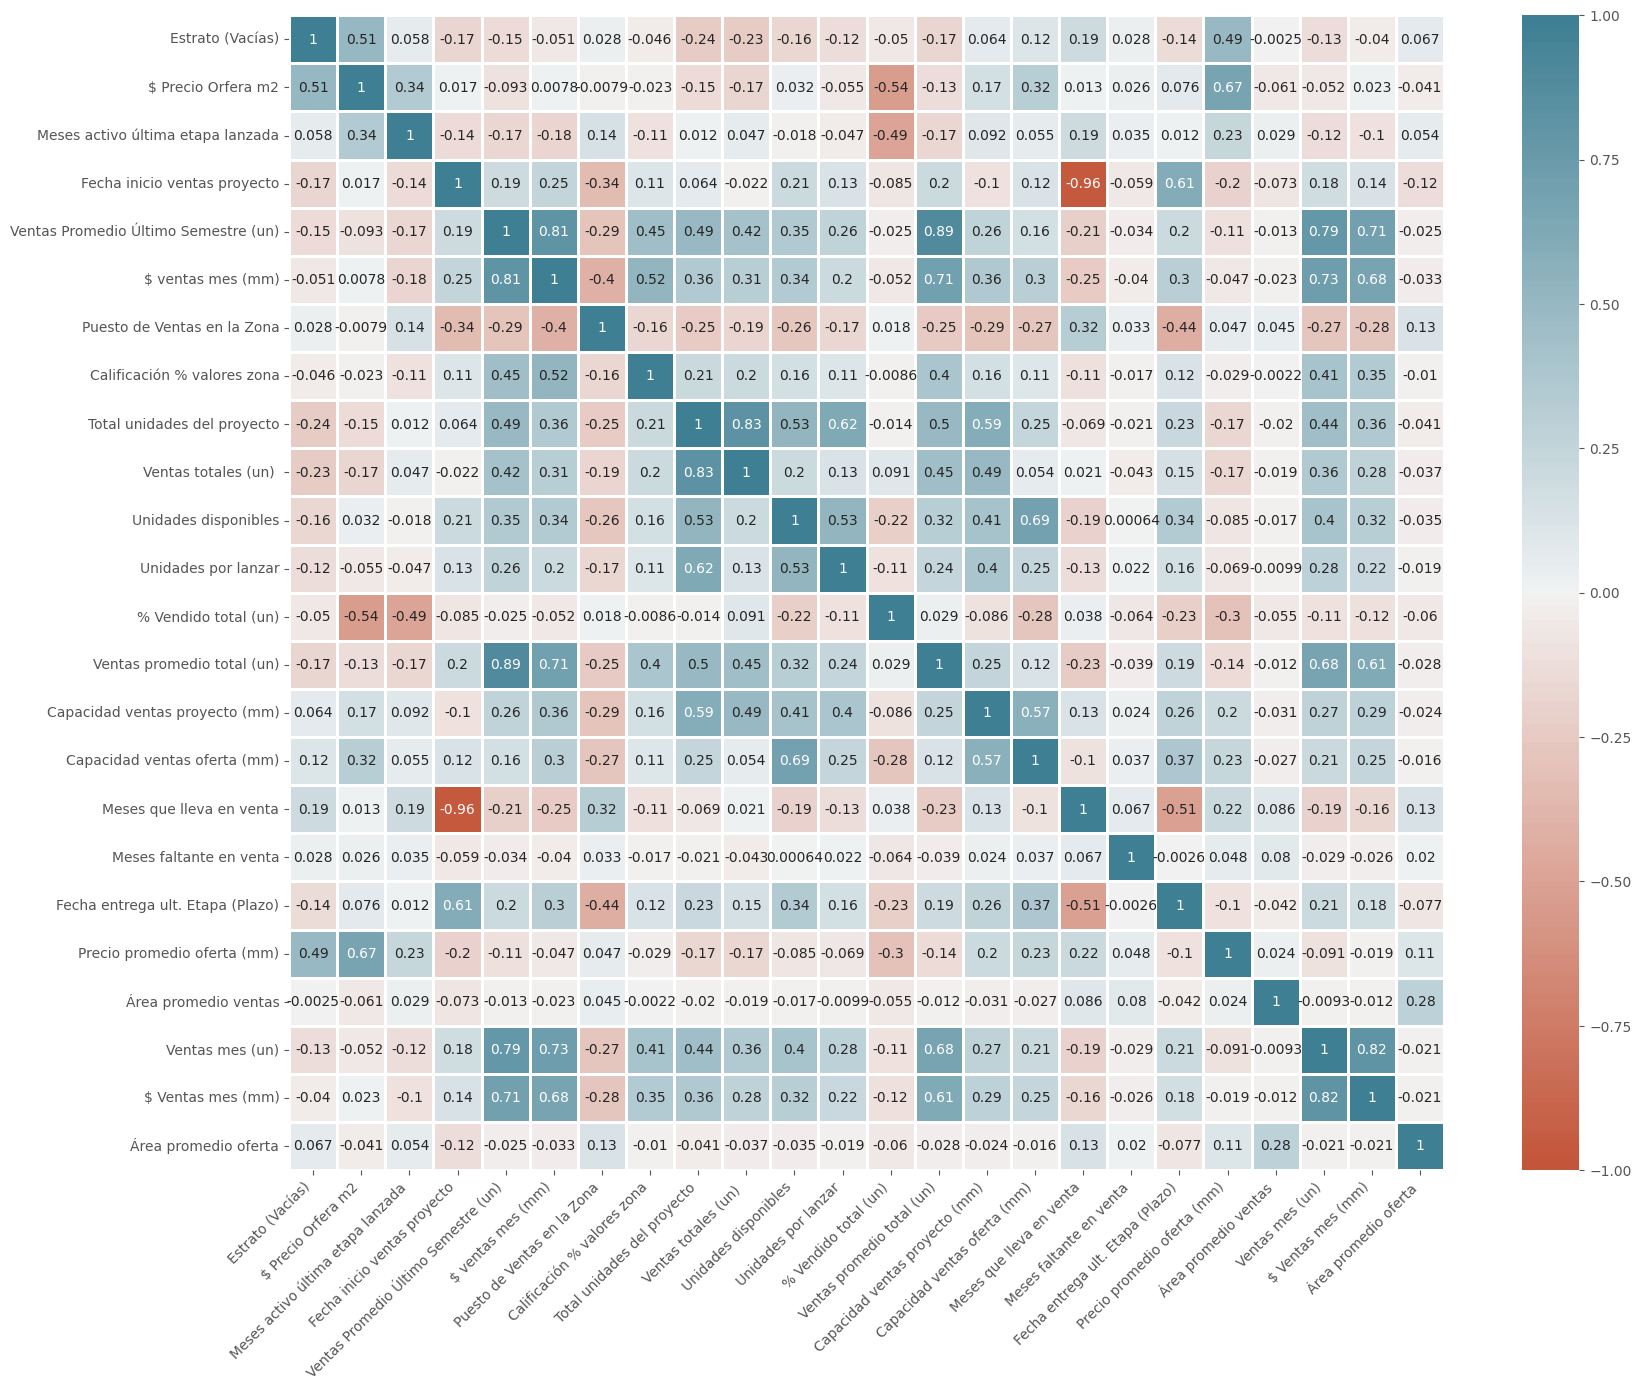

In [30]:
# Gráfico de correlaciones
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20, 15))

sns.heatmap(
    corr_matrix,
    annot=True,
    cbar=True,
    annot_kws={"size": 10},
    vmin=-1,
    vmax=1,
    center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    ax=ax,
    linewidths=1
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right',
)

ax.tick_params(labelsize=10)


Text(0.5, 0.98, 'Distribución variables numéricas')

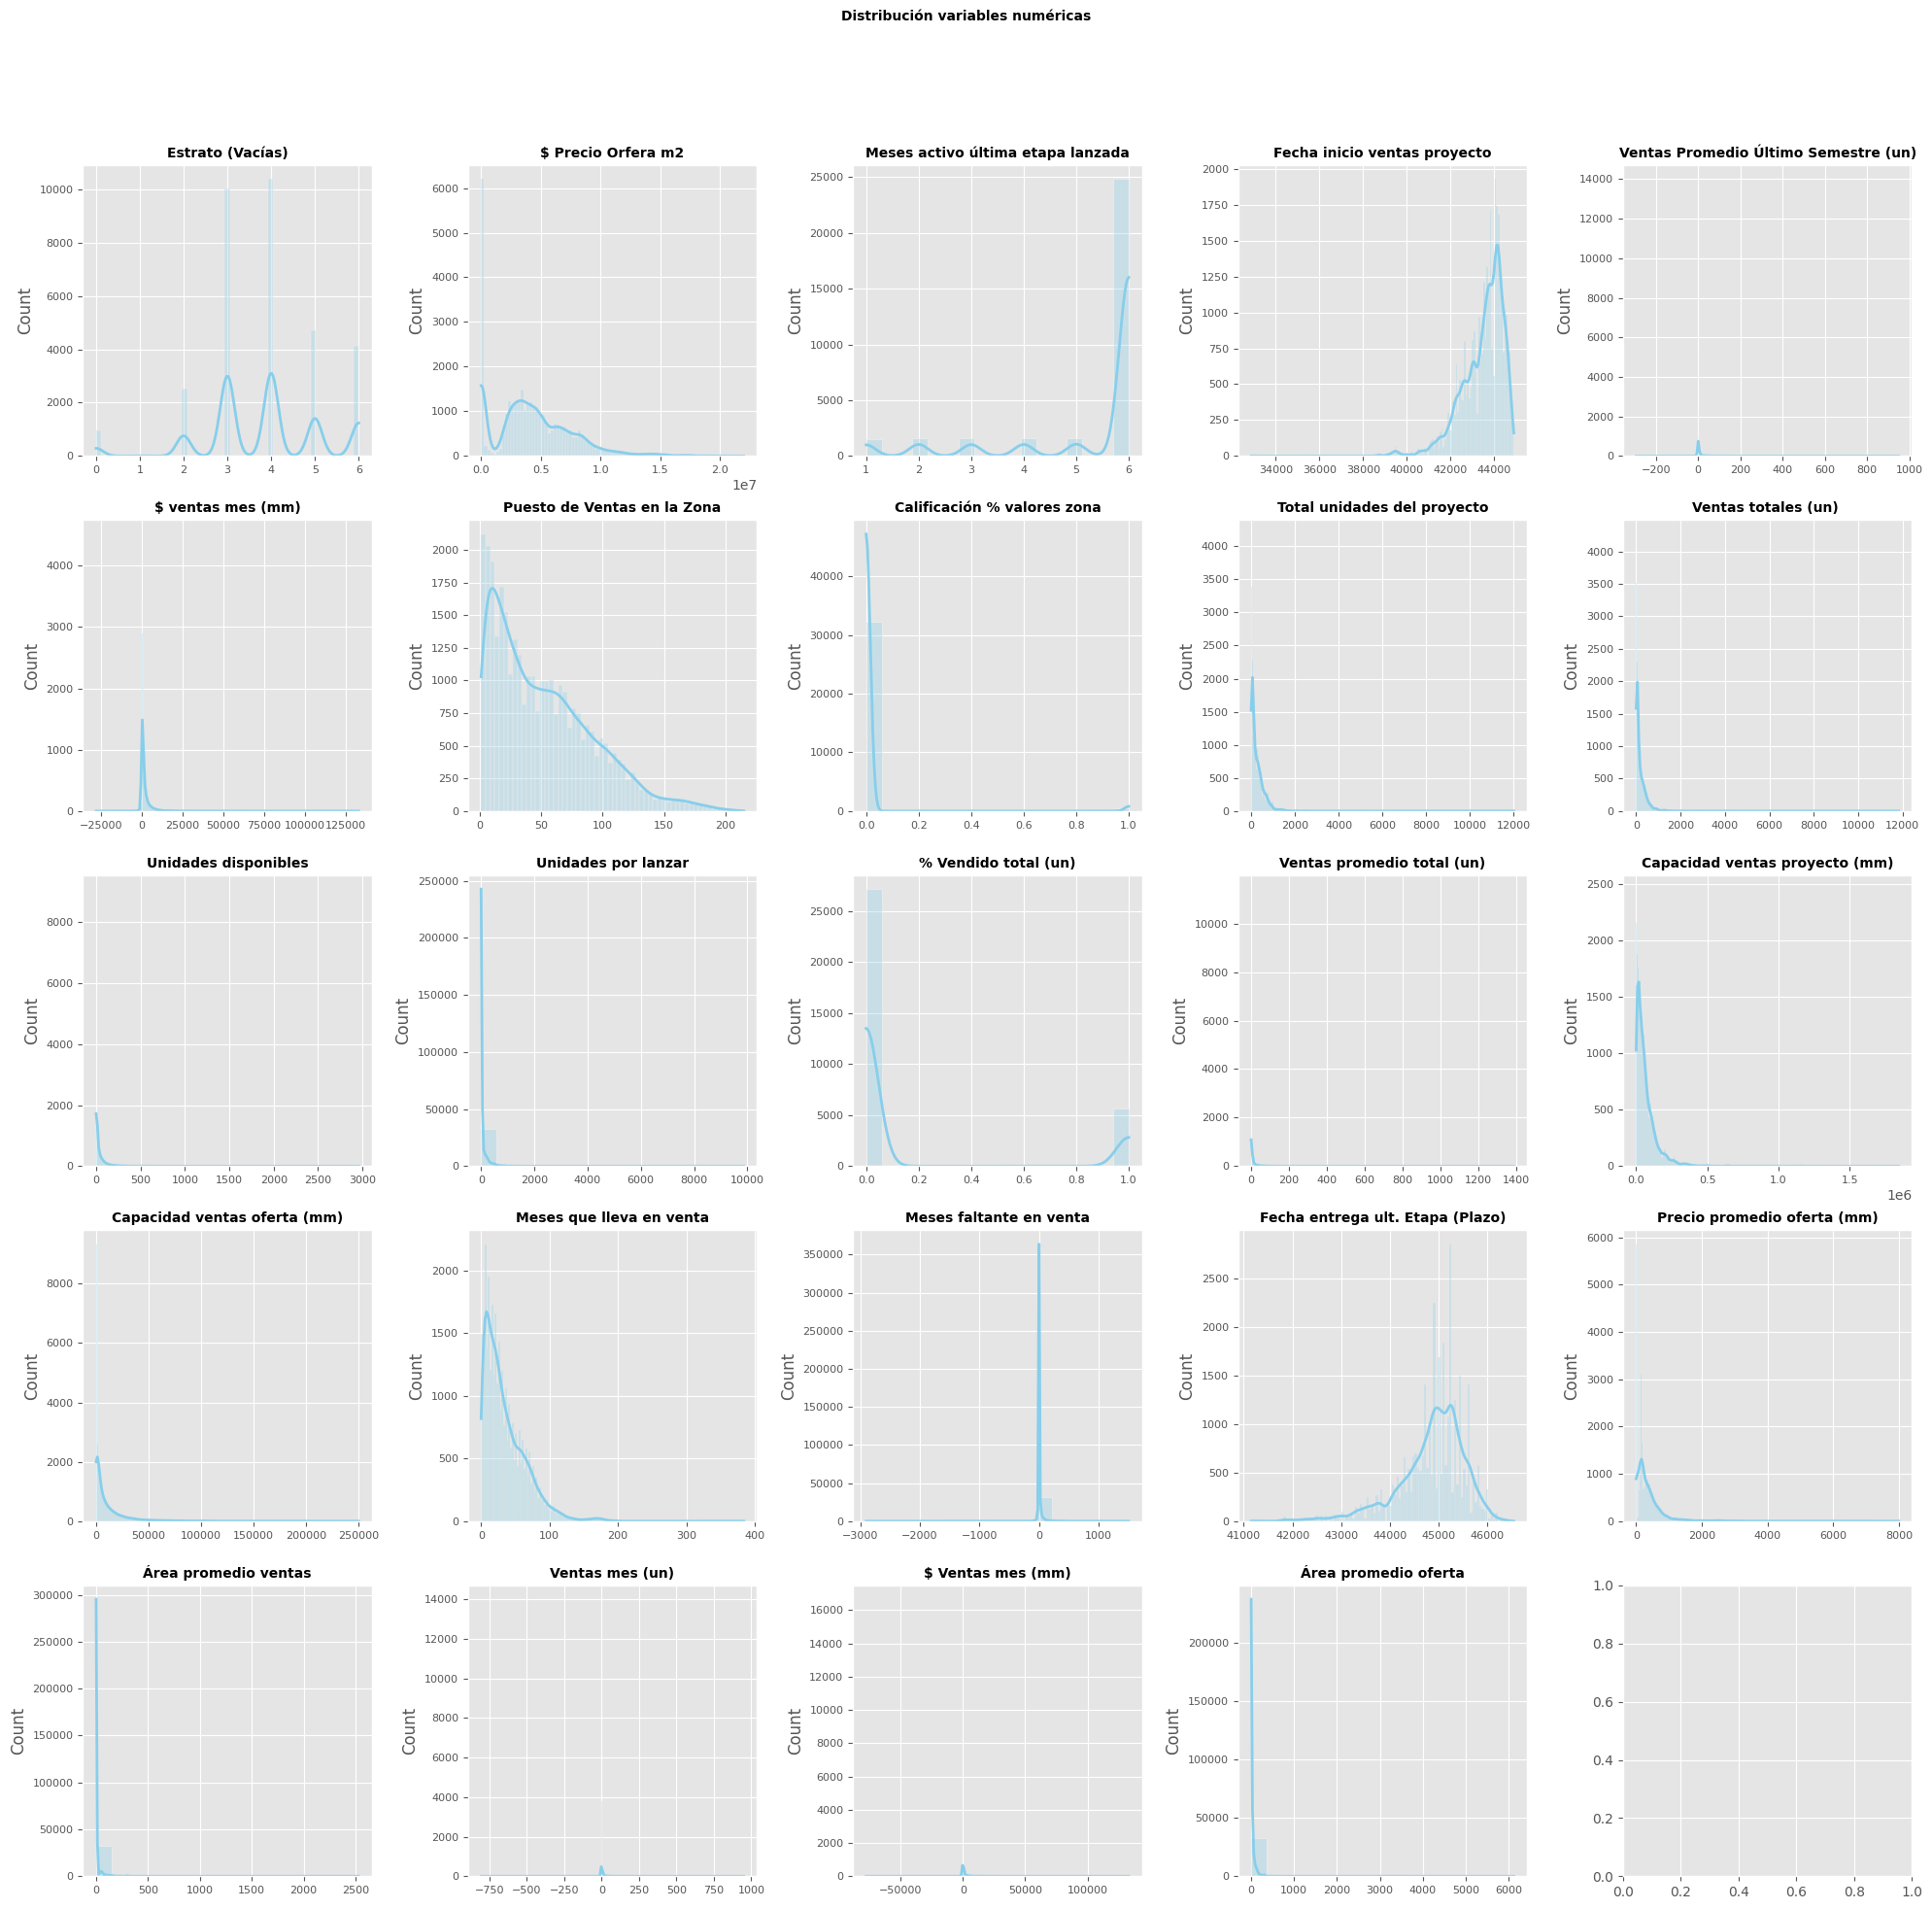

In [31]:
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(20, 20))
axes = axes.flat
columnas_numeric = registros_cleaned.columns

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data=registros_cleaned,
        x=colum,
        stat="count",
        kde=True,
        color='skyblue',
        line_kws={'linewidth': 2},
        alpha=0.3,
        ax=axes[i]
    )
    axes[i].set_title(colum, fontsize=10, fontweight="bold")
    axes[i].tick_params(labelsize=8)
    axes[i].set_xlabel("")


fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables numéricas',
             fontsize=10, fontweight="bold")


<AxesSubplot: xlabel='$ Ventas mes (mm)'>

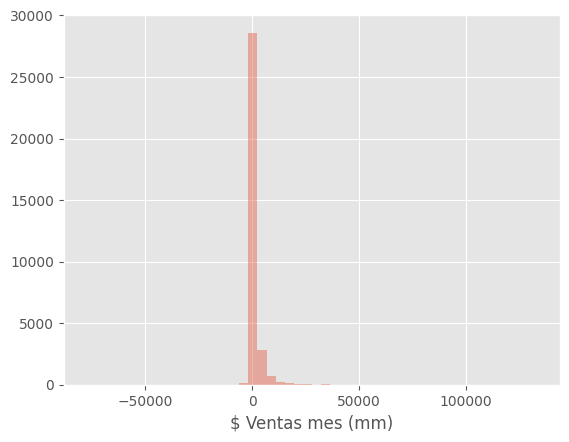

In [32]:
# Distribución de las ventas por mes
sns.distplot(registros_cleaned["$ Ventas mes (mm)"],kde = False)

In [50]:
# Ajuste del modelo
v_x = registros_cleaned[[
    #'Ciudad',
    #'Nombre Proyecto',
    #'Construye',
    #'Zona',
    #'Sub Zona',
    "Estrato (Vacías)",
    "$ Precio Orfera m2",
    "Meses activo última etapa lanzada",
    'Fecha inicio ventas proyecto',
    'Ventas Promedio Último Semestre (un)',
    '$ ventas mes (mm)',
    'Puesto de Ventas en la Zona',
    'Calificación % valores zona',
    'Total unidades del proyecto',
    'Ventas totales (un) ',
    'Unidades disponibles',
    'Unidades por lanzar',
    '% Vendido total (un)',
    'Ventas promedio total (un)',
    'Capacidad ventas proyecto (mm)',
    'Capacidad ventas oferta (mm)',
    'Meses que lleva en venta',
    'Meses faltante en venta',
    'Fecha entrega ult. Etapa (Plazo)',
    'Precio promedio oferta (mm)',
    'Área promedio ventas',
    'Ventas mes (un)',
    #'$ Ventas mes (mm)',
    'Área promedio oferta',
    #'Tipo',
    #'Tipo de vivienda (VIS o No VIS)',
    #'Lote futuro',
    #'Mes de Ventas',
    #'Mes año ventas',
    #'Año',
    #'Q',
    #'$ vpn m2',
]]
''''''
v_y = registros_cleaned["$ Ventas mes (mm)"]

X_prueba, X_entrenamiento, Y_prueba, Y_entrenamiento = train_test_split(
    v_x,
    v_y.values.reshape(-1, 1),
    train_size=0.85,
    random_state=1234,
    shuffle=True
)

In [51]:
## Creación del modelo utilizando el modo fórmula (similar a R)

columnas = [
    #'Ciudad',
    #'Nombre Proyecto',
    #'Construye',
    #'Zona',
    #'Sub Zona',
    "Estrato (Vacías)",
    "$ Precio Orfera m2",
    "Meses activo última etapa lanzada",
    'Fecha inicio ventas proyecto',
    'Ventas Promedio Último Semestre (un)',
    '$ ventas mes (mm)',
    'Puesto de Ventas en la Zona',
    'Calificación % valores zona',
    'Total unidades del proyecto',
    'Ventas totales (un) ',
    'Unidades disponibles',
    'Unidades por lanzar',
    '% Vendido total (un)',
    'Ventas promedio total (un)',
    'Capacidad ventas proyecto (mm)',
    'Capacidad ventas oferta (mm)',
    'Meses que lleva en venta',
    'Meses faltante en venta',
    'Fecha entrega ult. Etapa (Plazo)',
    'Precio promedio oferta (mm)',
    'Área promedio ventas',
    'Ventas mes (un)',
    'Área promedio oferta',
    '$ Ventas mes (mm)',
    #'Tipo',
    #'Tipo de vivienda (VIS o No VIS)',
    #'Lote futuro',
    #'Mes de Ventas',
    #'Mes año ventas',
    #'Año',
    #'Q',
    #'$ vpn m2',
]

'''    '''

datos_train = pd.DataFrame(
    np.hstack((X_entrenamiento, Y_entrenamiento)),
    columns=registros_cleaned.columns
)

datos_train.head(10)

string_formula = '\'' + columnas[-1] + '\' ~ '

for i, x in enumerate(columnas):
    if i == len(columnas) - 2:
        string_formula += '\'' + x + '\''
        break
    string_formula += '\'' + x + '\' + '

modelo = smf.ols(formula=string_formula, data=datos_train)
modelo = modelo.fit()
modelo.summary()


PatsyError: Number of rows mismatch between data argument and '$ Ventas mes (mm)' (4921 versus 1)
    '$ Ventas mes (mm)' ~ 'Estrato (Vacías)' + '$ Precio Orfera m2' + 'Meses activo última etapa lanzada' + 'Fecha inicio ventas proyecto' + 'Ventas Promedio Último Semestre (un)' + '$ ventas mes (mm)' + 'Puesto de Ventas en la Zona' + 'Calificación % valores zona' + 'Total unidades del proyecto' + 'Ventas totales (un) ' + 'Unidades disponibles' + 'Unidades por lanzar' + '% Vendido total (un)' + 'Ventas promedio total (un)' + 'Capacidad ventas proyecto (mm)' + 'Capacidad ventas oferta (mm)' + 'Meses que lleva en venta' + 'Meses faltante en venta' + 'Fecha entrega ult. Etapa (Plazo)' + 'Precio promedio oferta (mm)' + 'Área promedio ventas' + 'Ventas mes (un)' + 'Área promedio oferta'
    ^^^^^^^^^^^^^^^^^^^

In [52]:
# Creación del modelo utilizando matrices como en scikitlearn
# A la matriz de predictores se le tiene que añadir una columna de 1s para el intercept del modelo
X_entrenamiento = sm.add_constant(X_entrenamiento, prepend=True)
modelo = sm.OLS(endog=Y_entrenamiento, exog=X_entrenamiento)
modelo = modelo.fit()
print(modelo.summary())

significancia_minima = .7

serie_pvalues_significativos = modelo.pvalues[lambda x: x <=
                                              significancia_minima]

print('')
print(
    f'Significativas: {len(serie_pvalues_significativos)} variables de {len(modelo.params)}')
print(serie_pvalues_significativos.sort_values())
print(
    f'No significativas: {len(modelo.pvalues[lambda x: x > significancia_minima])} variables de {len(modelo.params)}')
print(modelo.pvalues[lambda x: x > significancia_minima].sort_values())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.675
Method:                 Least Squares   F-statistic:                     445.2
Date:                Fri, 10 Feb 2023   Prob (F-statistic):               0.00
Time:                        15:25:50   Log-Likelihood:                -43512.
No. Observations:                4921   AIC:                         8.707e+04
Df Residuals:                    4897   BIC:                         8.723e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
                                           coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------


In [53]:
# Predicciones con intervalo de confianza 
X_prueba = sm.add_constant(X_prueba, prepend=True)
predicciones = modelo.predict(exog = X_prueba)
predicciones

16296      829.687621
5152      -149.328649
3305      5202.705294
21011     -425.877143
23782     2463.574992
             ...     
9449     10044.320235
32399      935.283681
17048      604.354293
23924      856.483129
27439     -252.613561
Length: 27882, dtype: float64

In [54]:
# RMSE
rmse = mean_squared_error(
        y_true  = Y_prueba,
        y_pred  = predicciones,
        squared = False
       )
print(f'El error (rmse) de test es: {rmse}')

El error (rmse) de test es: 1855.6009451293921
